In [3]:
import numpy as np
import os, sys
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..'))) # To import keras_squeezenet.
from keras_squeezenet import SqueezeNet
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.preprocessing import image

Using TensorFlow backend.


In [28]:
import keras.backend as K
import matplotlib.pyplot as plt
%matplotlib inline

<h1>Randomly initialized weights</h1>
<p>The weights should look random, and it should not be able to predict the correct class.</p>

In [47]:
# Get weights that are not trained (i.e., randomly initialized)
model = SqueezeNet(weights=None)

(3, 3, 3, 64)


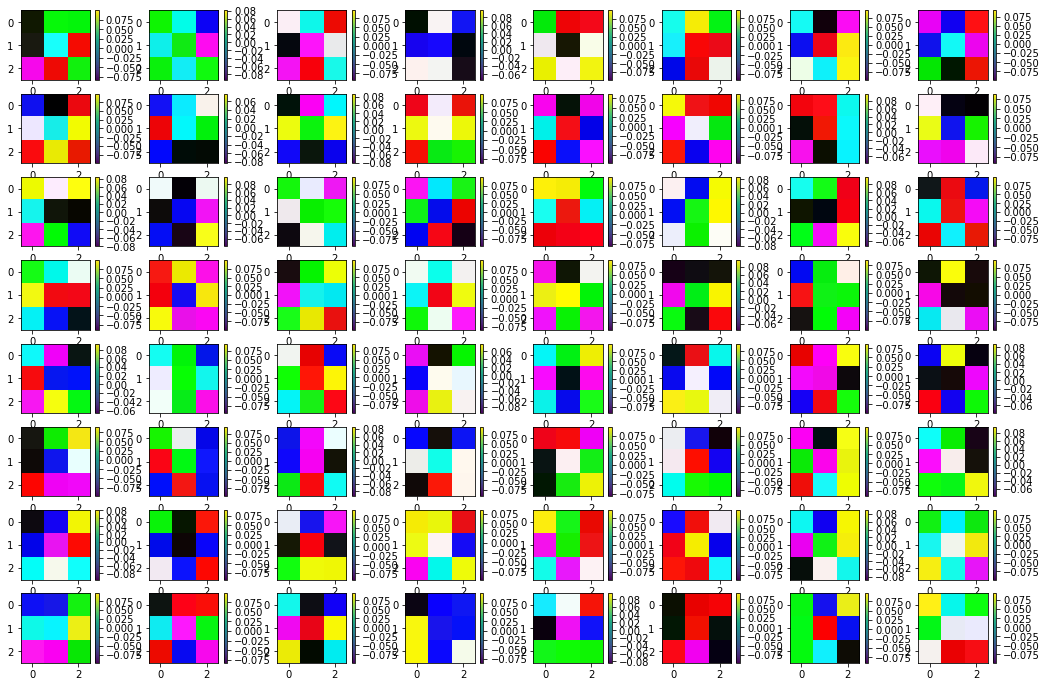

In [46]:
W = K.eval(model.weights[0])
print(W.shape)
plt.figure(figsize=(18,12))
for idx in range(W.shape[-1]):
    plt.subplot(8,8,idx+1)
    plt.imshow(W[:,:,:,idx]); plt.colorbar()

In [48]:
img = image.load_img('../images/cat.jpeg', target_size=(227, 227))

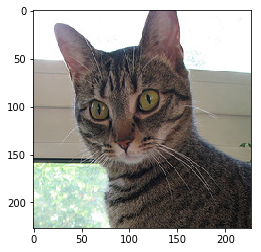

In [49]:
# Let's check out this nice lookin' cat!
plt.imshow(img)

In [50]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds))
# These predictions should look random (since the network is not trained)!

('Predicted:', [[(u'n04069434', u'reflex_camera', 0.0010395811), (u'n07880968', u'burrito', 0.0010380474), (u'n02788148', u'bannister', 0.0010371221), (u'n04525038', u'velvet', 0.001036562), (u'n03141823', u'crutch', 0.0010349749)]])


<h1>Weights pretrained over ImageNet</h1>
<p>Check to make sure we can get the pretrained weights. The weights should have some structure, and the classification should be pretty good, since the model is already trained.</p>

In [51]:
# Get weights that are trained over ImageNet.
model = SqueezeNet(weights='imagenet')

(3, 3, 3, 64)


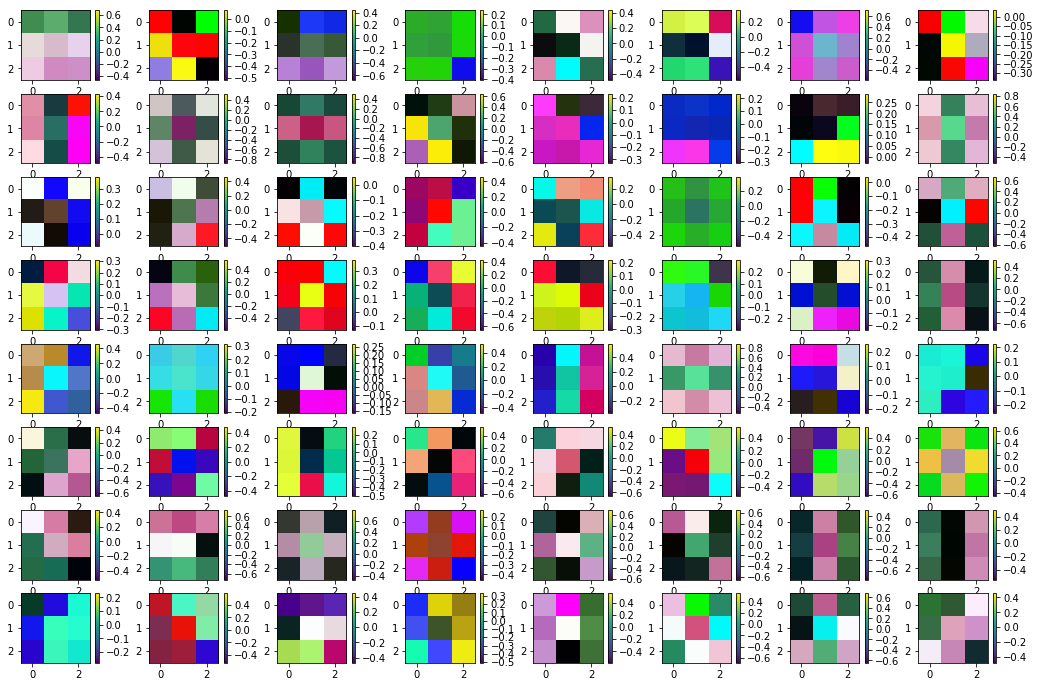

In [52]:
W = K.eval(model.weights[0])
print(W.shape)
plt.figure(figsize=(18,12))
for idx in range(W.shape[-1]):
    plt.subplot(8,8,idx+1)
    plt.imshow(W[:,:,:,idx]); plt.colorbar()

In [53]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds))
# Alright! These look good!

('Predicted:', [[(u'n02123045', u'tabby', 0.82134378), (u'n02124075', u'Egyptian_cat', 0.121806), (u'n02123159', u'tiger_cat', 0.056821216), (u'n02127052', u'lynx', 2.2597918e-05), (u'n02129604', u'tiger', 5.1768179e-06)]])
